## 네이버에서 ESG 데이터를 수집한 후 worldcloud 그리기
### 1. ESG 뉴스 스크래핑하기
### 2. csv 파일 열어서 데이터 분석하고 wordcloud 그리기
### (1) ESG 제목 데이터로 wordcloud 그리기
### (2) ESG 기사 내용 데이터로 wordcloud 그리기

In [ ]:
!pip install konlpy

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 55 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
# 패키지 불러오기
import numpy as np                    
import pandas as pd                   
import matplotlib.pyplot as plt       

## Text 데이터 처리
from konlpy.tag import Kkma

from collections import Counter
from wordcloud import WordCloud

from bs4 import BeautifulSoup
import requests

import warnings
warnings.filterwarnings('ignore')


## 1. ESG 뉴스 스크래핑하기

In [ ]:
# 해드라인 검색 및 추출 함수를 정의
t_list = []

def web_scraping(keyword, end, start = 1): 
    # 네이버 뉴스 url의 특성을 고려하여 추가된 수식
    end = (end-1)*10 + 1
        
    while 1:
        
        if start > end :    # 스타트 페이지가 마지막 페이지보다 크면 while 문을 빠져 나감 
            break        
        
        url ='https://search.naver.com/search.naver?where=news&sm=tab_pge&query={0}&start={1}'.format(keyword,start)

        req = requests.get(url)    # 해당 페이지를 가져옴

        page = BeautifulSoup(req.text, 'html.parser')
        
        news_titles = page.find_all(attrs='news_tit')
        medias = page.find_all(attrs='info press') 
        texts = page.find_all('a', attrs='api_txt_lines dsc_txt_wrap')

        # 검색 결과 중에서 큰 제목 & 해당 사이트 주소 추출 
        ablist=[] 
        for one in news_titles :
            a = one.attrs['title']
            b = one.attrs['href']
            ablist.append([a, b])
        
        # 언론사 추출
        i = 0
        for one in medias :
            c = one.text
            ablist[i].insert(0, c)
            i += 1

        # 기사 본문 내용 일부 추출
        j = 0
        for one in texts :
            d = one.text
            ablist[j].insert(2, d)
            j += 1
        
        t_list.append(ablist)
        
        start += 10

In [ ]:
# 검색어를 ESG로 설정 

#keyword = input('검색어를 입력하세요 : ')
keyword = 'ESG'
print()

In [ ]:
# 마지막 페이지를 1000으로 설정
#end_page = int(input('마지막 페이지 번호를 입력하세요 : '))
end_page = 1000
web_scraping(keyword, end_page)       # end_page 페이지 까지 스크래핑

In [ ]:
# 총 1000 페이지 스크래핑함
len(t_list)

1000

In [ ]:
# 한 페이지 당 10개의 기사가 있음. 이를 t_list 안에 리스트로 넣어놓음
t_list[0]

[['연합뉴스',
  '한국투자증권, 이사회 산하 ESG위원회 신설',
  '한국투자증권은 이사회를 열고 환경·사회·지배구조(ESG) 경영의 기본 전략 및 정책을 수립하는 ESG위원회 설립을 의결했다고 10일 밝혔다. ESG위원회는 정일문 한국투자증권 사장, 김태원 구글코리아 전무, 조영태...',
  'http://yna.kr/AKR20210510070500002?did=1195m'],
 ['뉴시스',
  '"ESG, 궁금증 풀어드립니다"…대한상의, \'ESG 뉴스레터\'',
  "최근 기업들의 관심도가 높아지고 있는 ESG(환경·사회·지배구조)에 대해 쉽게 이해할 수 있도록 대한상공회의소가 매달 ESG 관련 정보를 기업들에게 제공한다. 대한상공회의소는 이달부터 회원사들을 대상으로 'ESG...",
  'http://www.newsis.com/view/?id=NISX20210510_0001435205&cID=13001&pID=13000'],
 ['뉴스1',
  'SM상선, 연내 IPO 준비 박차…신사옥 이전·ESG경영 강화',
  'SM상선은 환경, 노동, 인권, 윤리, 사회공헌 등에 지속적인 투자를 전개해 ESG 경영도 강화한다. 앞으로 강화될 것으로 예상되는 IMO(국제해사기구)의 환경규제에 신속하게 대응해 나가는 한편 해운사, 협력업체, 항만...',
  'https://www.news1.kr/articles/?4300919'],
 ['파이낸셜뉴스',
  'SK하이닉스, 작년 사회적 가치 약 5조 창출 "ESG 강화"',
  '김윤옥 SK하이닉스 지속경영담당(부사장)은 "환경·사회·지배구조(ESG) 경영을 강화하고 사회적 가치 창출 규모를 키워가면서 인류와 사회에 기여하는 방법을 모색하겠다"고 전했다. 한편 SK 주요 관계사들은 지난...',
  'http://www.fnnews.com/news/202105101004151929'],
 ['서울경제',
  'ESG 경영 나선 한미글로벌···ESG 위원회 신설',
  '글로벌 건설사업관리(PM·Projec

In [ ]:
# 리스트 안 리스트를 꺼내서 각 페이지별로 리스트에 있는 것이 아니라 
#하나의 리스트 안에 모든 페이지 정보가 들어가도록 구성함 
t_list_final=[]

for k in t_list:
    for m in k:
        t_list_final.append(m)
print(len(t_list_final))

10000


In [ ]:
# csv 파일로 만들었음 ['media', 'title', 'text', 'url']

df = pd.DataFrame(t_list_final)
df.columns = ['media', 'title', 'text', 'url']
df.head()

media                               title  \
0    연합뉴스            한국투자증권, 이사회 산하 ESG위원회 신설   
1     뉴시스  "ESG, 궁금증 풀어드립니다"…대한상의, 'ESG 뉴스레터'   
2     뉴스1  SM상선, 연내 IPO 준비 박차…신사옥 이전·ESG경영 강화   
3  파이낸셜뉴스  SK하이닉스, 작년 사회적 가치 약 5조 창출 "ESG 강화"   
4    서울경제        ESG 경영 나선 한미글로벌···ESG 위원회 신설   

                                                text  \
0  한국투자증권은 이사회를 열고 환경·사회·지배구조(ESG) 경영의 기본 전략 및 정책...   
1  최근 기업들의 관심도가 높아지고 있는 ESG(환경·사회·지배구조)에 대해 쉽게 이해...   
2  SM상선은 환경, 노동, 인권, 윤리, 사회공헌 등에 지속적인 투자를 전개해 ESG...   
3  김윤옥 SK하이닉스 지속경영담당(부사장)은 "환경·사회·지배구조(ESG) 경영을 강...   
4  글로벌 건설사업관리(PM·Project Management) 기업 한미글로벌이 이사...   

                                                 url  
0       http://yna.kr/AKR20210510070500002?did=1195m  
1  http://www.newsis.com/view/?id=NISX20210510_00...  
2             https://www.news1.kr/articles/?4300919  
3      http://www.fnnews.com/news/202105101004151929  
4        https://www.sedaily.com/NewsView/22MB1W23RG

In [ ]:
# 데이터프레임을 csv로 변환하여 저장함
df.to_csv('C:\\Users\\user\\Documents\\web_text_mining_ewha\\esg_news.csv')

## 2. csv 파일 열어서 데이터 분석하고 wordcloud 그리기
### (1) ESG 제목 데이터로 wordcloud 그리기

In [ ]:
# esg_news 데이터 업로드하기
from google.colab import files
file_uploaded = files.upload()

Saving esg_news.csv to esg_news.csv


In [ ]:
# csv 파일 dataframe으로 열기
import io
import pandas as pd

df2 = pd.read_csv(io.BytesIO(file_uploaded['esg_news.csv']))

df2.head()

Unnamed: 0  ...                                                url
0           0  ...       http://yna.kr/AKR20210510070500002?did=1195m
1           1  ...  http://www.newsis.com/view/?id=NISX20210510_00...
2           2  ...             https://www.news1.kr/articles/?4300919
3           3  ...      http://www.fnnews.com/news/202105101004151929
4           4  ...        https://www.sedaily.com/NewsView/22MB1W23RG

[5 rows x 5 columns]

In [ ]:
# 데이터 분석을 위하여 데이터프레임에서 제목만 추출함
title_li = df2['title'].to_list()
title_li

['한국투자증권, 이사회 산하 ESG위원회 신설',
 '"ESG, 궁금증 풀어드립니다"…대한상의, \'ESG 뉴스레터\'',
 'SM상선, 연내 IPO 준비 박차…신사옥 이전·ESG경영 강화',
 'SK하이닉스, 작년 사회적 가치 약 5조 창출 "ESG 강화"',
 'ESG 경영 나선 한미글로벌···ESG 위원회 신설',
 '4월 ESG채권 발행 11.3兆…전월대비 43% `급증`',
 '부산항만공사,항만 공기업 최초 ESG 경영추진 선포',
 '한미글로벌, ESG 경영 본격 박차',
 '남부발전, ESG 경영 실천 위한 대국민 혁신 아이디어 공모',
 '"디지털 혁신·ESG 투자 등 새로운 가치 잇는 금융투자 파트너로 도약"',
 '한국금융미래포럼, ESG 가이드 제시',
 '1000만원 탄 논문 뭔가 보니…스타트업·ESG',
 '한미글로벌, ESG 경영 본격 박차',
 '문승욱, 마켓컬리 물류센터 방문...”유통 환경·안전 등 ESG 확산 지원”',
 '남부발전, ESG 경영 실천 위한 대국민 혁신 아이디어 공모',
 '\'ESG 경영\' 힘주는 SK하이닉스…"지난해 경제간접 기여성과 5조 넘어"',
 '‘탈(脫) 플라스틱’ 나선 기업들… ESG 경영 속도 낸다',
 'SM상선 "연내 증시 입성···노선확장·ESG경영 강화"',
 '우리은행, 종이절약 캠페인 및 대고객 이벤트로 ESG경영 실천한다',
 "고용부, 내달 11일까지 ESG 경영 확산 '100초 영상' 공모전",
 '[ESF 2021]"ESG發 산업 격변…기업 성장분야 바뀐다"',
 '한화솔루션, ESG 확산 위한 상생협력 MOU 체결',
 '"회장님들 몸소 실천" ESG 경영 강화에 다시 부는 챌린지 바람',
 "KB국민카드, 3억달러 지속가능채권 발행…'ESG경영 선도'",
 '최고경영자 20여명 제주서 ESG 열공',
 '글로벌 큰손 “ESG 경영” 요구 커진다',
 '한국남부발전, ESG경영위원회 신설…해상풍력단지 건설 추진',
 '[김화진 칼럼] ESG와 주주행동주의',
 '"ESG 궁

In [ ]:
# 형태소 분석

kkma = Kkma()

sentences_tag = []

for sentence in title_li:
    word_tag = kkma.pos(sentence)
    sentences_tag.append(word_tag)

print(sentences_tag)

[[('한국', 'NNG'), ('투자', 'NNG'), ('증권', 'NNG'), (',', 'SP'), ('이사회', 'NNG'), ('산하', 'NNG'), ('ESG', 'OL'), ('위원회', 'NNG'), ('신설', 'NNG')], [('"', 'SS'), ('ESG', 'OL'), (',', 'SP'), ('궁금증', 'NNG'), ('풀', 'VV'), ('어', 'ECD'), ('드리', 'VXV'), ('ㅂ니다', 'EFN'), ('"', 'SS'), ('…', 'SE'), ('대한', 'NNG'), ('상의', 'NNG'), (',', 'SP'), ("'", 'SS'), ('ESG', 'OL'), ('뉴스', 'NNG'), ('레터', 'NNG'), ("'", 'SS')], [('SM', 'OL'), ('상선', 'NNG'), (',', 'SP'), ('연내', 'NNG'), ('IPO', 'OL'), ('준비', 'NNG'), ('박차', 'NNG'), ('…', 'SE'), ('신', 'XPN'), ('사옥', 'NNG'), ('이전', 'NNG'), ('·', 'SP'), ('ESG', 'OL'), ('경영', 'NNG'), ('강화', 'NNG')], [('SK', 'OL'), ('하이닉스', 'NNP'), (',', 'SP'), ('작년', 'NNG'), ('사회적', 'NNG'), ('가치', 'NNG'), ('약', 'NNG'), ('5', 'NR'), ('조', 'NNG'), ('창출', 'NNG'), ('"', 'SS'), ('ESG', 'OL'), ('강화', 'NNG'), ('"', 'SS')], [('ESG', 'OL'), ('경영', 'NNG'), ('나서', 'VV'), ('ㄴ', 'ETD'), ('한미', 'NNG'), ('글로벌', 'NNG'), ('···', 'SW'), ('ESG', 'OL'), ('위원회', 'NNG'), ('신설', 'NNG')], [('4', 'NR'), ('월', 'NNM'), ('

In [ ]:
# 형태소 분석 후 명사만 추출

noun_list = []

for sentence in sentences_tag:
    for word, tag in sentence: #word와 tag 중에서 word 단어만
        if tag in ['NNG']:               
            noun_list.append(word)
            
print(noun_list)

['한국', '투자', '증권', '이사회', '산하', '위원회', '신설', '궁금증', '대한', '상의', '뉴스', '레터', '상선', '연내', '준비', '박차', '사옥', '이전', '경영', '강화', '작년', '사회적', '가치', '약', '조', '창출', '강화', '경영', '한미', '글로벌', '위원회', '신설', '채권', '발행', '전월', '대비', '급증', '부산항', '공사', '항만', '공기업', '최초', '경영', '추진', '선포', '한미', '글로벌', '경영', '본격', '남부', '발전', '경영', '실천', '위', '대국민', '혁신', '아이디어', '공모', '디지털', '혁신', '투자', '새', '가치', '금융', '투자', '파트너', '도약', '한국', '금융', '미래', '포럼', '이드', '제시', '논문', '스타트', '업', '한미', '글로벌', '경영', '본격', '문승', '마켓', '물류', '센터', '방문', '유통', '환경', '안전', '확산', '지원', '남부', '발전', '경영', '실천', '위', '대국민', '혁신', '아이디어', '공모', '경영', '지난해', '경제', '간접', '기여', '성과', '탈', '플라스틱', '기업', '경영', '속', '상선', '연내', '증시', '입성', '노선', '확장', '경영', '강화', '우리은행', '종이', '절약', '캠페인', '대', '고객', '이벤트', '경영', '실천', '고용', '부', '내달', '경영', '확산', '영상', '공모전', '산업', '격변', '기업', '성장', '분야', '한화', '솔루션', '확산', '위', '상생', '협력', '체결', '장님', '몸', '실천', '경영', '강화', '챌린지', '바람', '국민', '카드', '달러', '지속', '가능', '채권', '발행', '경영', '선도', '최고', '경영자

In [ ]:
# 명사 중에서 두음절 단어만 추출 

print('전체 명사의 수: ', len(noun_list))
print() 

noun_list = [word for word in noun_list if len(word) > 1]    # 명사중에서 두음절 이상의 단어  추출

print('두음절 이상의 명사의 수: ', len(noun_list))
print() 

print(noun_list[:100])   # 처음부터 나오는 순서대로 100개 단어 출력 

전체 명사의 수:  67822

두음절 이상의 명사의 수:  61868

['한국', '투자', '증권', '이사회', '산하', '위원회', '신설', '궁금증', '대한', '상의', '뉴스', '레터', '상선', '연내', '준비', '박차', '사옥', '이전', '경영', '강화', '작년', '사회적', '가치', '창출', '강화', '경영', '한미', '글로벌', '위원회', '신설', '채권', '발행', '전월', '대비', '급증', '부산항', '공사', '항만', '공기업', '최초', '경영', '추진', '선포', '한미', '글로벌', '경영', '본격', '남부', '발전', '경영', '실천', '대국민', '혁신', '아이디어', '공모', '디지털', '혁신', '투자', '가치', '금융', '투자', '파트너', '도약', '한국', '금융', '미래', '포럼', '이드', '제시', '논문', '스타트', '한미', '글로벌', '경영', '본격', '문승', '마켓', '물류', '센터', '방문', '유통', '환경', '안전', '확산', '지원', '남부', '발전', '경영', '실천', '대국민', '혁신', '아이디어', '공모', '경영', '지난해', '경제', '간접', '기여', '성과', '플라스틱']


In [ ]:
# 단어의 출현 횟수 카운트

counts = Counter(noun_list)
words = counts.most_common(50)     # 가장 많이 출현한 횟수 순으로 50개 단어만 추출
print(words)

[('경영', 4393), ('기업', 1552), ('위원회', 1508), ('채권', 1474), ('환경', 1450), ('발행', 1316), ('은행', 1306), ('금융', 1234), ('사회적', 1034), ('기술', 768), ('지원', 761), ('신설', 729), ('녹색', 728), ('한화', 712), ('규모', 703), ('공개', 655), ('하나', 655), ('확대', 635), ('출범', 626), ('개최', 595), ('뉴딜', 578), ('한국판', 570), ('우리은행', 559), ('도입', 556), ('가치', 555), ('선언', 551), ('본격화', 546), ('기금', 545), ('보증', 542), ('성과', 536), ('기차', 525), ('이사회', 522), ('정보', 522), ('개선', 521), ('공시', 516), ('무공해', 508), ('매장', 498), ('방안', 498), ('스타', 496), ('일회용', 496), ('가속도', 496), ('프리미엄', 495), ('산하', 494), ('시그널', 494), ('바이오', 494), ('토론회', 494), ('몸값', 493), ('경오', 493), ('측정', 493), ('중요', 491)]


In [ ]:
# 실루엣을 이용한 워드 클라우드를 위해 이미지 업로드
from google.colab import files
file_uploaded = files.upload()

Saving leaf.jpg to leaf.jpg


In [ ]:
# 워드 클라우드

import numpy as np                    
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud
from wordcloud  import ImageColorGenerator

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 실루엣 이미지 업로드
cloud_img = plt.imread('leaf.jpg')

# 워드 클라우드 세팅
wordcloud = WordCloud(font_path='NanumBarunGothic',
                      background_color='white',
                      random_state = 1,
                      color_func = ImageColorGenerator(cloud_img),   # img의 color 를 이용
                      mask = cloud_img)      # 그림 이미지에 맞게 그림 

print(dict(words))

{'경영': 4393, '기업': 1552, '위원회': 1508, '채권': 1474, '환경': 1450, '발행': 1316, '은행': 1306, '금융': 1234, '사회적': 1034, '기술': 768, '지원': 761, '신설': 729, '녹색': 728, '한화': 712, '규모': 703, '공개': 655, '하나': 655, '확대': 635, '출범': 626, '개최': 595, '뉴딜': 578, '한국판': 570, '우리은행': 559, '도입': 556, '가치': 555, '선언': 551, '본격화': 546, '기금': 545, '보증': 542, '성과': 536, '기차': 525, '이사회': 522, '정보': 522, '개선': 521, '공시': 516, '무공해': 508, '매장': 498, '방안': 498, '스타': 496, '일회용': 496, '가속도': 496, '프리미엄': 495, '산하': 494, '시그널': 494, '바이오': 494, '토론회': 494, '몸값': 493, '경오': 493, '측정': 493, '중요': 491}


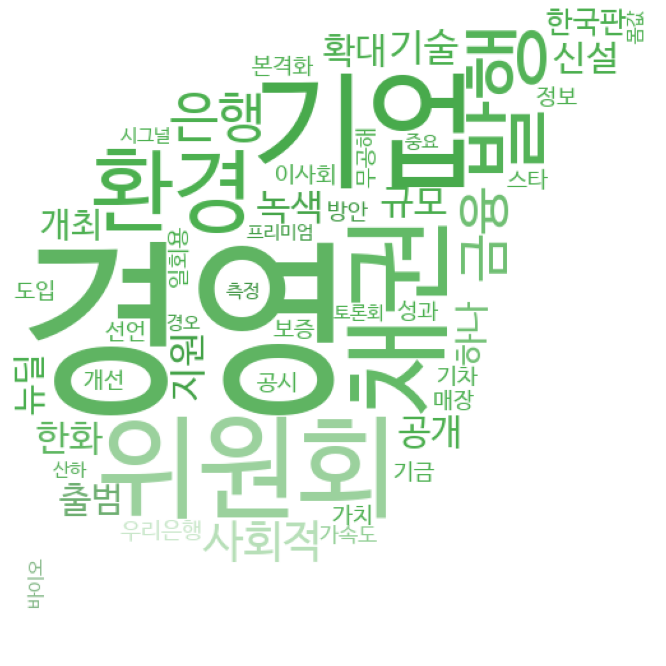

In [ ]:
# 워드클라우드 이미지 print
cloud = wordcloud.generate_from_frequencies(dict(words))  

fig = plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(cloud)
plt.show()

### (2) ESG 기사 내용 데이터로 wordcloud 그리기

In [ ]:
# 데이터 분석을 위하여 데이터프레임에서 '기사 내용 일부'만 추출함
title_li2 = df2['text'].to_list()
title_li2

['한국투자증권은 이사회를 열고 환경·사회·지배구조(ESG) 경영의 기본 전략 및 정책을 수립하는 ESG위원회 설립을 의결했다고 10일 밝혔다. ESG위원회는 정일문 한국투자증권 사장, 김태원 구글코리아 전무, 조영태...',
 "최근 기업들의 관심도가 높아지고 있는 ESG(환경·사회·지배구조)에 대해 쉽게 이해할 수 있도록 대한상공회의소가 매달 ESG 관련 정보를 기업들에게 제공한다. 대한상공회의소는 이달부터 회원사들을 대상으로 'ESG...",
 'SM상선은 환경, 노동, 인권, 윤리, 사회공헌 등에 지속적인 투자를 전개해 ESG 경영도 강화한다. 앞으로 강화될 것으로 예상되는 IMO(국제해사기구)의 환경규제에 신속하게 대응해 나가는 한편 해운사, 협력업체, 항만...',
 '김윤옥 SK하이닉스 지속경영담당(부사장)은 "환경·사회·지배구조(ESG) 경영을 강화하고 사회적 가치 창출 규모를 키워가면서 인류와 사회에 기여하는 방법을 모색하겠다"고 전했다. 한편 SK 주요 관계사들은 지난...',
 '글로벌 건설사업관리(PM·Project Management) 기업 한미글로벌이 이사회와 사내에 각각 조직을 신설하고 ESG(환경·사회·지배구조) 경영을 강화한다. 한미글로벌은 최근 이사회 내에 ESG경영의 컨트롤타워 역할을 할 ESG...',
 '4월 발행된 ESG채권은 86개종목, 11조3260억원으로 전월(7조9420억원)대비 43%(3조4200억원)나 늘었다. 10일... 4월 ESG채권 발행은 11조3260억원으로 전월대비 43%(3조4200억원)나 늘었다. 녹색채권은 현대캐피탈...',
 "부산항만공사(BPA)가 10일 본사(부산 중앙동)에서 항만 공기업으로는 처음으로 'ESG 경영 추진 선포식'을 개최하고 본격적인 ESG 경영에 나섰다. ESG(Environmental, Social and Corporate Governance)는 환경·사회·지배구조를...",
 '사진/한미글로벌 \xa0글로벌 건설사업관리(PM) 선도기업 한미글로벌이 ESG(환경·사회·지

In [ ]:
# Twitter에서 형태소 분석을 하기 위해 리스트 변형
'''
'제목' 분석 시에는 형태소 분석 전에 별다른 변형/조작이 필요 없었는데, 
각 요소가 2개 이상의 문장으로 이루어진 경우, 형태소 분석기에서 인식을 하지 못하고 TypeError 오류가 남.
그래서 '기사 내용' 분석을 위해서는 문장 별로 잘라준 뒤에 형태소 분석을 해야됨.
'''

real_li = []
for j in range(10000):
  a=str(title_li2[j]).split('.')
  #print(a)
  sample_list = list(filter(None, a))
  real_li.append(sample_list)

In [ ]:
whole_li = []
for i in real_li:
  for j in i:
    whole_li.append(j)

print(whole_li[:5])

['한국투자증권은 이사회를 열고 환경·사회·지배구조(ESG) 경영의 기본 전략 및 정책을 수립하는 ESG위원회 설립을 의결했다고 10일 밝혔다',
 ' ESG위원회는 정일문 한국투자증권 사장, 김태원 구글코리아 전무, 조영태',
 '최근 기업들의 관심도가 높아지고 있는 ESG(환경·사회·지배구조)에 대해 쉽게 이해할 수 있도록 대한상공회의소가 매달 ESG 관련 정보를 기업들에게 제공한다',
 " 대한상공회의소는 이달부터 회원사들을 대상으로 'ESG",
 'SM상선은 환경, 노동, 인권, 윤리, 사회공헌 등에 지속적인 투자를 전개해 ESG 경영도 강화한다']

In [ ]:
# Kkma가 시간이 오래걸려서 '제목'보다 데이터 크기가 더 큰 '기사 내용 일부'를 분석할 때는 Twitter를 사용해봄 
# 형태소 분석

from konlpy.tag import Twitter
 
twitter = Twitter()
sentences_tag2 = []

for sentence2 in whole_li:
    word_tag2 = twitter.pos(sentence2)
    sentences_tag2.append(word_tag2)

sentences_tag2

[[('한국', 'Noun'),
  ('투자', 'Noun'),
  ('증권', 'Noun'),
  ('은', 'Josa'),
  ('이사회', 'Noun'),
  ('를', 'Josa'),
  ('열고', 'Verb'),
  ('환경', 'Noun'),
  ('·', 'Punctuation'),
  ('사회', 'Noun'),
  ('·', 'Punctuation'),
  ('지배구조', 'Noun'),
  ('(', 'Punctuation'),
  ('ESG', 'Alpha'),
  (')', 'Punctuation'),
  ('경영', 'Noun'),
  ('의', 'Josa'),
  ('기본', 'Noun'),
  ('전략', 'Noun'),
  ('및', 'Noun'),
  ('정책', 'Noun'),
  ('을', 'Josa'),
  ('수립', 'Noun'),
  ('하는', 'Verb'),
  ('ESG', 'Alpha'),
  ('위원회', 'Noun'),
  ('설립', 'Noun'),
  ('을', 'Josa'),
  ('의결', 'Noun'),
  ('했다고', 'Verb'),
  ('10일', 'Number'),
  ('밝혔다', 'Verb')],
 [('ESG', 'Alpha'),
  ('위원회', 'Noun'),
  ('는', 'Josa'),
  ('정일', 'Noun'),
  ('문', 'Noun'),
  ('한국', 'Noun'),
  ('투자', 'Noun'),
  ('증권', 'Noun'),
  ('사장', 'Noun'),
  (',', 'Punctuation'),
  ('김태원', 'Noun'),
  ('구글', 'Noun'),
  ('코리아', 'Noun'),
  ('전무', 'Noun'),
  (',', 'Punctuation'),
  ('조', 'Modifier'),
  ('영태', 'Noun')],
 [('최근', 'Noun'),
  ('기업', 'Noun'),
  ('들', 'Suffix'),
  ('의', 'Jos

In [ ]:
# 형태소 분석 후 명사만 추출

noun_list2 = []

for sentence2 in sentences_tag2:
    for word2, tag2 in sentence2: #word와 tag 중에서 word만 추출
        if tag2 in ['Noun']:               
            noun_list2.append(word2)
            
print(noun_list2)

['한국', '투자', '증권', '이사회', '환경', '사회', '지배구조', '경영', '기본', '전략', '및', '정책', '수립', '위원회', '설립', '의결', '위원회', '정일', '문', '한국', '투자', '증권', '사장', '김태원', '구글', '코리아', '전무', '영태', '최근', '기업', '관심', '도', '환경', '사회', '지배구조', '대해', '이해', '수', '상공회의소', '매달', '관련', '정보', '기업', '제공', '상공회의소', '달', '회원', '사', '대상', '상선', '환경', '노동', '인권', '윤리', '사회', '공헌', '등', '지속', '투자', '전개', '경영', '앞', '강화', '것', '예상', '국제', '기구', '의', '환경', '규제', '대응', '한편', '해운', '사', '협력', '업체', '항만', '김윤옥', '하이닉스', '담당', '부사', '은', '환경', '사회', '지배구조', '경영', '사회', '가치', '창', '규모', '인류', '사회', '기여', '방법', '모색', '고', '전', '한편', '주요', '관계', '사', '지난', '글로벌', '건설', '사업', '관리', '기업', '한미글로벌', '이사회', '사내', '각각', '조직', '신설', '환경', '사회', '지배구조', '경영', '한미글로벌', '최근', '이사회', '내', '경영', '컨트롤', '타워', '역할', '발행', '채권', '개', '종목', '전월', '대비', '나', '채권', '발행', '전월', '대비', '나', '녹색', '채권', '현대', '캐피탈', '부산', '항만', '공사', '본사', '부산', '중앙', '항만', '공기업', '처음', '경영', '추진', '선포', '개최', '본격', '경영', '환경', '사회', '지배구조', '사진', '한미글로벌', '건설', '사업', '관

In [ ]:
# 명사 중에서 두음절 단어만 추출 

print('전체 명사의 수: ', len(noun_list2))
print() 

noun_list2 = [word for word in noun_list2 if len(word) > 1]    # 명사중에서 두음절 이상의 단어  추출

print('두음절 이상의 명사의 수: ', len(noun_list2))
print() 

print(noun_list2[:100])   # 처음부터 나오는 순서대로 100개 단어 출력 

전체 명사의 수:  252827

두음절 이상의 명사의 수:  225589

['한국', '투자', '증권', '이사회', '환경', '사회', '지배구조', '경영', '기본', '전략', '정책', '수립', '위원회', '설립', '의결', '위원회', '정일', '한국', '투자', '증권', '사장', '김태원', '구글', '코리아', '전무', '영태', '최근', '기업', '관심', '환경', '사회', '지배구조', '대해', '이해', '상공회의소', '매달', '관련', '정보', '기업', '제공', '상공회의소', '회원', '대상', '상선', '환경', '노동', '인권', '윤리', '사회', '공헌', '지속', '투자', '전개', '경영', '강화', '예상', '국제', '기구', '환경', '규제', '대응', '한편', '해운', '협력', '업체', '항만', '김윤옥', '하이닉스', '담당', '부사', '환경', '사회', '지배구조', '경영', '사회', '가치', '규모', '인류', '사회', '기여', '방법', '모색', '한편', '주요', '관계', '지난', '글로벌', '건설', '사업', '관리', '기업', '한미글로벌', '이사회', '사내', '각각', '조직', '신설', '환경', '사회', '지배구조']


In [ ]:
# 단어의 출현 횟수 카운트

counts2 = Counter(noun_list2)
words2 = counts2.most_common(50)     # 가장 많이 출현한 횟수 순으로 50개 단어만 추출
print(words2)

[('경영', 10367), ('사회', 7754), ('환경', 7153), ('지배구조', 6045), ('채권', 5768), ('기업', 5100), ('발행', 2755), ('위해', 2751), ('위원회', 2573), ('금융', 2482), ('친환경', 2270), ('그룹', 2229), ('이번', 2142), ('지원', 2017), ('녹색', 2007), ('개선', 1724), ('글로벌', 1672), ('협약', 1645), ('공개', 1592), ('확대', 1556), ('정보', 1549), ('관련', 1488), ('지난', 1418), ('한국', 1390), ('한화', 1298), ('사업', 1255), ('책임', 1225), ('뉴딜', 1188), ('업계', 1161), ('목적', 1158), ('한국판', 1158), ('우리은행', 1123), ('실천', 1121), ('공시', 1082), ('지주', 1077), ('하나', 1065), ('이사회', 1028), ('방안', 1016), ('기술', 1009), ('캠코', 1007), ('특수', 1002), ('바람', 996), ('대세', 995), ('기관', 993), ('토론회', 991), ('프리미엄', 989), ('바이오', 987), ('매장', 986), ('제약', 984), ('탄소', 954)]


In [ ]:
# 워드 클라우드 (colormap style을 BrBG로 변경)

from wordcloud import WordCloud

wordcloud = WordCloud(font_path='NanumBarunGothic',
                      colormap = 'BrBG',
                      width=600,
                      height=600)

print(dict(words))

{'경영': 4393, '기업': 1552, '위원회': 1508, '채권': 1474, '환경': 1450, '발행': 1316, '은행': 1306, '금융': 1234, '사회적': 1034, '기술': 768, '지원': 761, '신설': 729, '녹색': 728, '한화': 712, '규모': 703, '공개': 655, '하나': 655, '확대': 635, '출범': 626, '개최': 595, '뉴딜': 578, '한국판': 570, '우리은행': 559, '도입': 556, '가치': 555, '선언': 551, '본격화': 546, '기금': 545, '보증': 542, '성과': 536, '기차': 525, '이사회': 522, '정보': 522, '개선': 521, '공시': 516, '무공해': 508, '매장': 498, '방안': 498, '스타': 496, '일회용': 496, '가속도': 496, '프리미엄': 495, '산하': 494, '시그널': 494, '바이오': 494, '토론회': 494, '몸값': 493, '경오': 493, '측정': 493, '중요': 491}


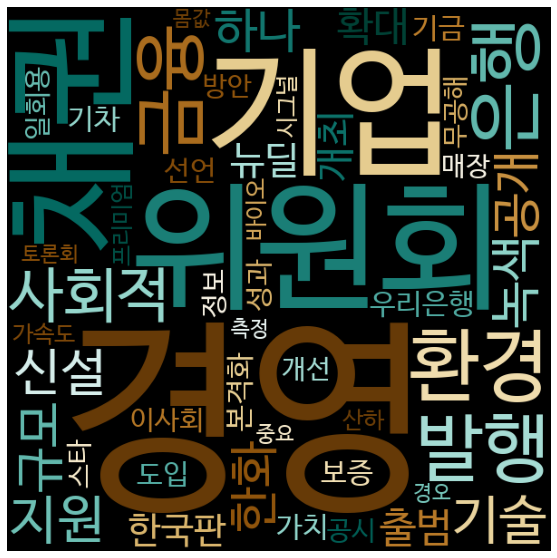

In [ ]:
# 워드 클라우드 print
# '제목' 분석 시 실루엣 방법을 사용하여 '기사 내용' 분석 시에는 일반적인 워드 클라우드를 사용하고, colormap 색을 ESG를 표현할 수 있는 색으로 선택함

cloud = wordcloud.generate_from_frequencies(dict(words))

plt.figure(figsize=(10, 10))
plt.axis('off')   
plt.imshow(cloud)
plt.show()